In [1]:
import pandas as pd
data = pd.read_csv('cluster clothing.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Trendy       73 non-null     int64 
 1   Styling      73 non-null     int64 
 2   Reliability  73 non-null     int64 
 3   Range        73 non-null     int64 
 4   Performance  73 non-null     int64 
 5   Comfort      73 non-null     int64 
 6   Choice       73 non-null     object
dtypes: int64(6), object(1)
memory usage: 4.1+ KB


In [4]:
data.columns

Index(['Trendy', 'Styling', 'Reliability', 'Range', 'Performance', 'Comfort',
       'Choice'],
      dtype='object')

In [5]:
y = data['Choice']
x = data.drop(columns='Choice')

In [6]:
x.shape

(73, 6)

In [7]:
data.shape

(73, 7)

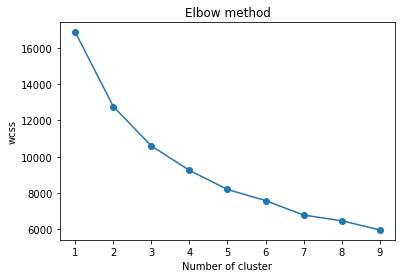

In [8]:
from sklearn.cluster import KMeans
list1 = []
for i in range(1,10):
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit(x)
    list1.append(Kmeans.inertia_)
    
# creating the scree plot
import matplotlib.pyplot as plt
plt.plot(range(1,10),list1,marker='o')
plt.title('Elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

In [9]:
kmeans_choice = KMeans(n_clusters=3,random_state=10)
y_kmeans = kmeans_choice.fit_predict(x)
print("the predicted clusters are:\n", y_kmeans)
print("the centers are:\n", kmeans_choice.cluster_centers_)

the predicted clusters are:
 [2 0 2 2 2 1 0 2 2 0 2 0 0 1 2 0 1 0 0 1 2 0 2 2 0 1 0 1 2 0 2 1 0 1 2 0 2
 0 0 2 0 2 2 0 1 2 0 0 2 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 2 2]
the centers are:
 [[15.12121212 13.57575758 20.60606061 13.         20.21212121 17.48484848]
 [22.66666667 22.         17.88888889 11.94444444 13.44444444 12.05555556]
 [ 8.         17.77272727 29.04545455  7.         23.13636364 15.04545455]]


In [10]:
data['cluster'] = y_kmeans

In [12]:
data.head()

,Trendy,Styling,Reliability,Range,Performance,Comfort,Choice,cluster
0,10,20,35,5,20,10,Reebok,2
1,25,5,25,5,25,15,Nike,0
2,10,20,30,10,10,20,Reebok,2
3,10,15,30,10,20,15,Reebok,2
4,20,10,40,1,14,15,Reebok,2


In [15]:
import pandas as pd
result = {'Original':y,'Predicted':y_kmeans}
clusterdf = pd.DataFrame(result,columns=['Original','Predicted'])

In [16]:
clusterdf['Predicted'].replace(to_replace=int("2"),value="Reebok",inplace=True)
clusterdf['Predicted'].replace(to_replace=int("0"),value="Nike",inplace=True)
clusterdf['Predicted'].replace(to_replace=int("1"),value="Adidas",inplace=True)

In [17]:
clusterdf.head()

,Original,Predicted
0,Reebok,Reebok
1,Nike,Nike
2,Reebok,Reebok
3,Reebok,Reebok
4,Reebok,Reebok


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(clusterdf['Original'],clusterdf['Predicted']))
print(accuracy_score(clusterdf['Original'],clusterdf['Predicted']))

[[15  5  1]
 [ 1 23  5]
 [ 2  5 16]]
0.7397260273972602


In [19]:
from scipy import stats
# creating three groups for reliability
a1 = data[data['cluster'] == 0]['Reliability']
a2 = data[data['cluster'] == 1]['Reliability']
a3 = data[data['cluster'] == 2]['Reliability']

In [21]:
# applying independent sample ttest
# there is no sifnificant difference between different clusters with respect to calories
print("Result of ANOVA test: ", stats.f_oneway(a1,a2,a3))

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['Reliability'],groups=data['cluster'],alpha=0.5)
print("result of Tukey test is: ",tukey.summary())
# this means that there is a singificant difference b/w all the groups

Result of ANOVA test:  F_onewayResult(statistic=23.21327961897393, pvalue=1.847605296149947e-08)
result of Tukey test is:  Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -2.7172 0.2269 -4.5643   -0.87   True
     0      2   8.4394  0.001  6.7043 10.1745   True
     1      2  11.1566  0.001  9.1531 13.1601   True
----------------------------------------------------
